In [ ]:
!pip install pm4py[all]



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=53c659578277b10cf569c26a773c034b1dff9d7586218b271225ee831263b05a
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [ ]:
!pip install pm4py

import pandas as pd
import matplotlib.pyplot as plt

from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.objects.conversion.log import converter as conversion_factory
from sklearn.ensemble import IsolationForest
from pm4py.statistics.traces.generic.log import case_statistics
from sklearn.ensemble import IsolationForest




/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BPI_Challenge_2012.xes.gz to BPI_Challenge_2012.xes.gz


In [ ]:
log = xes_importer.apply("BPI_Challenge_2012.xes.gz")
print("Number of cases (process instances):", len(log))
print("Number of events:", sum([len(trace) for trace in log]))


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

Number of cases (process instances): 13087
Number of events: 262200


In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics

activities = set()
for trace in log:
    for event in trace:
        activities.add(event["concept:name"])

print("List of unique activities:")
print(sorted(list(activities)))
print("Total number of unique activities:", len(activities))


List of unique activities:
['A_ACCEPTED', 'A_ACTIVATED', 'A_APPROVED', 'A_CANCELLED', 'A_DECLINED', 'A_FINALIZED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED', 'A_REGISTERED', 'A_SUBMITTED', 'O_ACCEPTED', 'O_CANCELLED', 'O_CREATED', 'O_DECLINED', 'O_SELECTED', 'O_SENT', 'O_SENT_BACK', 'W_Afhandelen leads', 'W_Beoordelen fraude', 'W_Completeren aanvraag', 'W_Nabellen incomplete dossiers', 'W_Nabellen offertes', 'W_Valideren aanvraag', 'W_Wijzigen contractgegevens']
Total number of unique activities: 24


Step 3.1 :  List of All Activities (Event Types) ^

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics

activity_count = {}

for trace in log:
    for event in trace:
        activity = event["concept:name"]
        if activity not in activity_count:
            activity_count[activity] = 0
        activity_count[activity] += 1

# Sort activities by frequency
activity_count_sorted = dict(sorted(activity_count.items(), key=lambda x: x[1], reverse=True))

# Print top 10 most frequent activities
print("Top 10 most frequent activities:")
for i, (activity, count) in enumerate(list(activity_count_sorted.items())[:10]):
    print(f"{i+1}. {activity}: {count}")


Top 10 most frequent activities:
1. W_Completeren aanvraag: 54850
2. W_Nabellen offertes: 52016
3. W_Nabellen incomplete dossiers: 25190
4. W_Valideren aanvraag: 20809
5. W_Afhandelen leads: 16566
6. A_SUBMITTED: 13087
7. A_PARTLYSUBMITTED: 13087
8. A_DECLINED: 7635
9. A_PREACCEPTED: 7367
10. O_SELECTED: 7030


Step 3.2 :  Frequency of Each Activity^

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics

# Get case durations as a list of floats (in seconds)
case_durations = case_statistics.get_all_case_durations(log, parameters={"format": "seconds"})

# Convert durations from seconds to days
duration_days = [d / 86400 for d in case_durations]

# Show basic statistics
print("Number of cases:", len(duration_days))
print("Minimum duration (days):", min(duration_days))
print("Maximum duration (days):", max(duration_days))
print("Average duration (days):", sum(duration_days) / len(duration_days))




Number of cases: 13087
Minimum duration (days): 2.1469904868691055e-05
Maximum duration (days): 137.17981495370466
Average duration (days): 8.621716910873683


Step 3.3 : Case Duration Statistics (Min, Max, Average)^

In [ ]:
from pm4py.statistics.start_activities.log import get as start_activities_get
from pm4py.statistics.end_activities.log import get as end_activities_get

start_activities = start_activities_get.get_start_activities(log)
end_activities = end_activities_get.get_end_activities(log)

print("Start activities and their frequencies:")
print(start_activities)
print("End activities and their frequencies:")
print(end_activities)


Start activities and their frequencies:
{'A_SUBMITTED': 13087}
End activities and their frequencies:
{'W_Valideren aanvraag': 2747, 'W_Wijzigen contractgegevens': 4, 'A_DECLINED': 3429, 'W_Completeren aanvraag': 1939, 'A_CANCELLED': 655, 'W_Nabellen incomplete dossiers': 452, 'W_Afhandelen leads': 2234, 'W_Nabellen offertes': 1290, 'W_Beoordelen fraude': 57, 'O_CANCELLED': 279, 'A_REGISTERED': 1}


In [ ]:
variants = case_statistics.get_variant_statistics(log)
print(f"Number of unique variants: {len(variants)}")
print("Top 5 most common variants:")
for variant in variants[:5]:
    print(f"Variant: {variant['variant']}, Count: {variant['count']}")


Number of unique variants: 4366
Top 5 most common variants:
Variant: ('A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_DECLINED'), Count: 3429
Variant: ('A_SUBMITTED', 'A_PARTLYSUBMITTED', 'W_Afhandelen leads', 'W_Afhandelen leads', 'A_DECLINED', 'W_Afhandelen leads'), Count: 1872
Variant: ('A_SUBMITTED', 'A_PARTLYSUBMITTED', 'W_Afhandelen leads', 'W_Afhandelen leads', 'W_Afhandelen leads', 'W_Afhandelen leads', 'A_DECLINED', 'W_Afhandelen leads'), Count: 271
Variant: ('A_SUBMITTED', 'A_PARTLYSUBMITTED', 'W_Afhandelen leads', 'W_Afhandelen leads', 'A_PREACCEPTED', 'W_Completeren aanvraag', 'W_Afhandelen leads', 'W_Completeren aanvraag', 'A_DECLINED', 'W_Completeren aanvraag'), Count: 209
Variant: ('A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED', 'W_Completeren aanvraag', 'W_Completeren aanvraag', 'A_DECLINED', 'W_Completeren aanvraag'), Count: 160


Step 3.5 : Trace Variants (Unique Sequences of Activities)^

<ipython-input-12-f4ea580b302a>:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


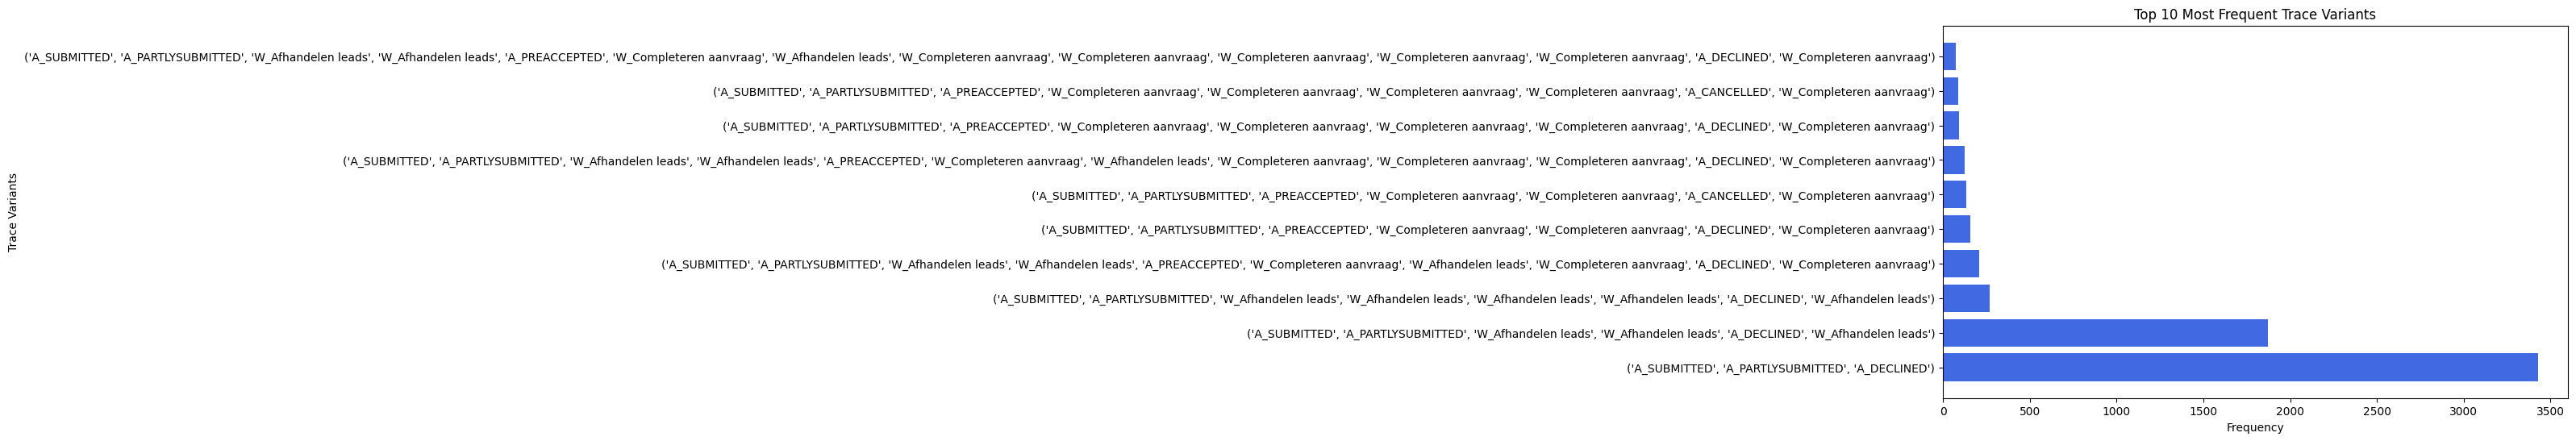

In [ ]:
import matplotlib.pyplot as plt

# Extract variant counts and names
variant_counts = [variant['count'] for variant in variants]
variant_names = [str(variant['variant']) for variant in variants]

# Visualize the top 10 most frequent trace variants
plt.figure(figsize=(10, 6))
plt.barh(variant_names[:10], variant_counts[:10], color="royalblue")
plt.xlabel('Frequency')
plt.ylabel('Trace Variants')
plt.title('Top 10 Most Frequent Trace Variants')
plt.tight_layout()
plt.show()


Top 10 most frequent trace variants based on their occurrence in the dataset.

visual of step 3.5^

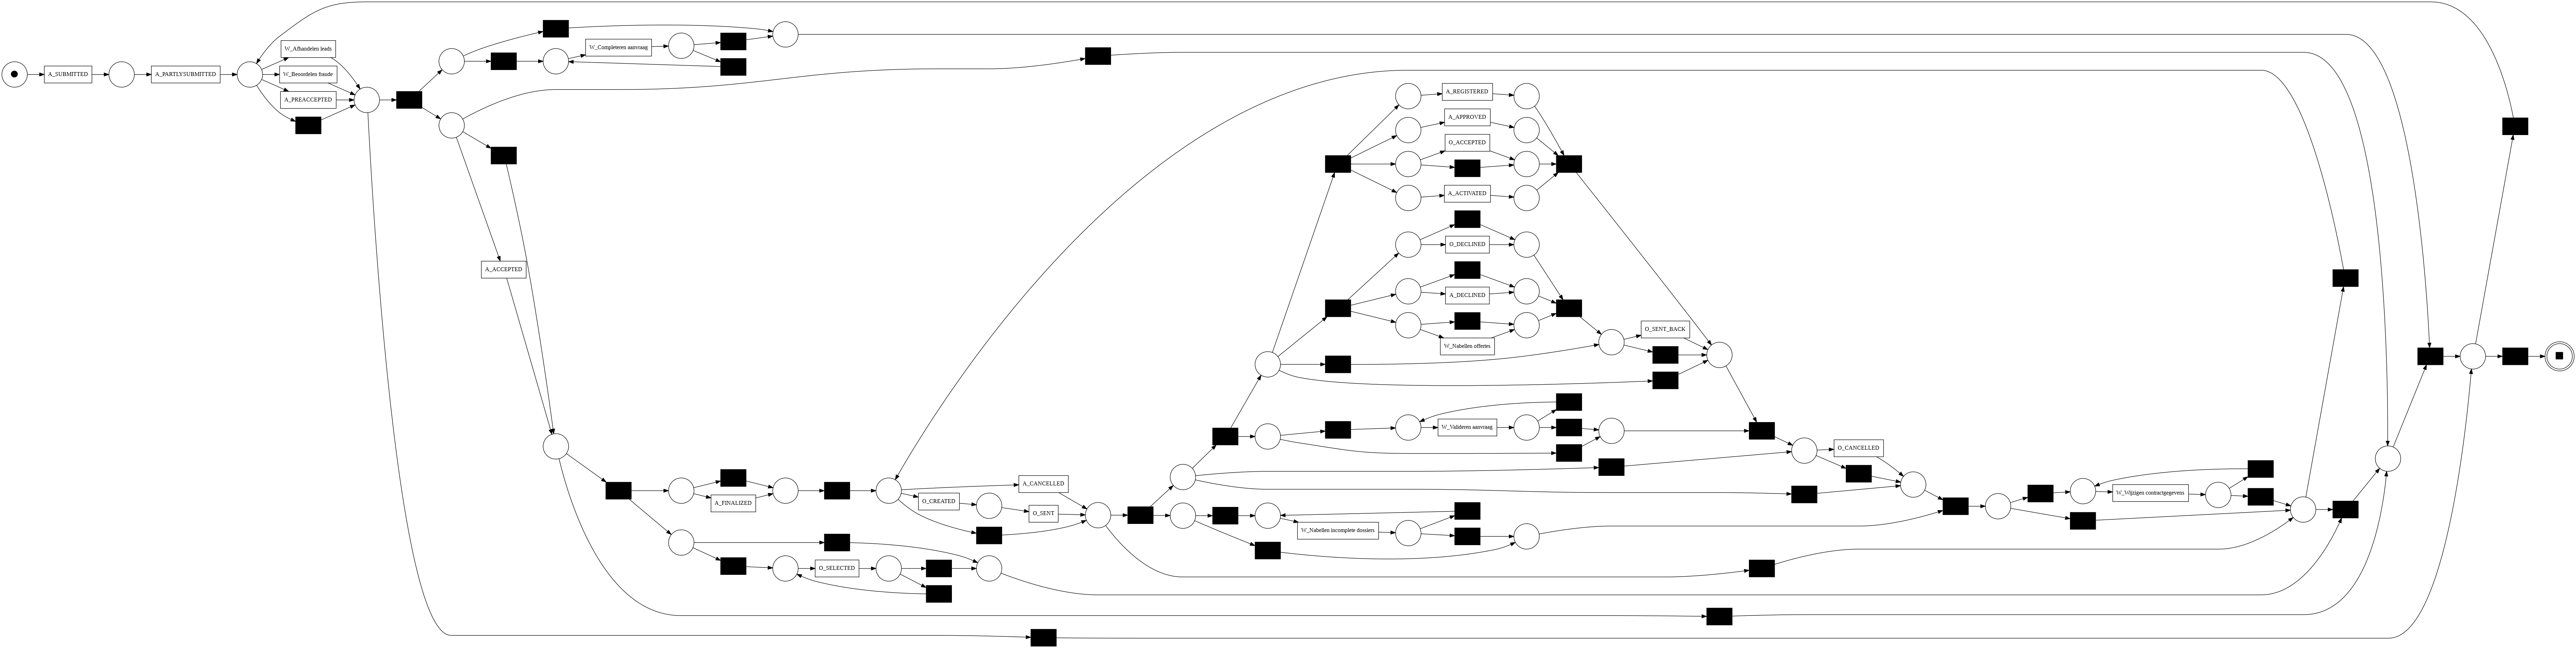

In [ ]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.conversion.process_tree import converter as tree_to_petri

# Step 1: Discover Process Tree
process_tree = inductive_miner.apply(log)

# Step 2: Convert Process Tree to Petri Net
net, initial_marking, final_marking = tree_to_petri.apply(process_tree)

# Step 3: Visualize the Petri Net
from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)



Step 4 : petri net discovery and visualization^

In [ ]:
# Import modules
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

# Conformance Checking using Token-based Replay
replayed_traces = token_replay.apply(log, net, initial_marking, final_marking)

print("=== CONFORMANCE CHECKING ===")
deviated_traces = [idx + 1 for idx, trace in enumerate(replayed_traces) if not trace['trace_is_fit']]
print(f"Total Deviations Detected: {len(deviated_traces)} out of {len(replayed_traces)} traces.")
print(f"Example Deviated Traces: {deviated_traces[:5]}")  # Show first 5 examples

# Fitness Evaluation
# Calculate fitness as the percentage of traces that are fitting
total_traces = len(replayed_traces)
fitting_traces = sum(1 for trace in replayed_traces if trace['trace_is_fit'])
fitness = fitting_traces / total_traces

print("\n=== FITNESS EVALUATION ===")
print(f"Fitness Score: {fitness:.4f}")



replaying log with TBR, completed traces ::   0%|          | 0/4366 [00:00<?, ?it/s]

=== CONFORMANCE CHECKING ===
Total Deviations Detected: 5011 out of 13087 traces.
Example Deviated Traces: [1, 2, 3, 10, 11]

=== FITNESS EVALUATION ===
Fitness Score: 0.6171


Step 5: Conformance Checking and fitness evaluation ^

In [ ]:
# ✅ Install PM4Py
!pip install pm4py

# ✅ Imports
import pandas as pd
import numpy as np
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.conversion.log import converter as pm4py_log_converter


In [ ]:
# ✅ Load your BPI 2012 dataset (update path if needed)
log_path = "/content/BPI_Challenge_2012.xes.gz"

# Load XES log into PM4Py event log object
event_log_pm4py = xes_importer.apply(log_path)

# Convert PM4Py event log to pandas DataFrame
event_log_df = pm4py_log_converter.apply(event_log_pm4py, variant=pm4py_log_converter.Variants.TO_DATA_FRAME)

# Show first rows
event_log_df.head()


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546,2011-10-01 00:38:44.546,173688,20000
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880,2011-10-01 00:38:44.546,173688,20000
2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906,2011-10-01 00:38:44.546,173688,20000
3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875,2011-10-01 00:38:44.546,173688,20000
4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437,2011-10-01 00:38:44.546,173688,20000


In [ ]:
# ✅ Rename columns for consistency
event_log_df.rename(columns={
    'case:concept:name': 'trace_id',
    'concept:name': 'activity',
    'time:timestamp': 'timestamp',
    'org:resource': 'resource'
}, inplace=True)

# ✅ Sort by trace_id and timestamp to ensure correct event order
event_log_df.sort_values(by=['trace_id', 'timestamp'], inplace=True)

# ✅ Calculate duration between consecutive events in the same trace
event_log_df['next_timestamp'] = event_log_df.groupby('trace_id')['timestamp'].shift(-1)
event_log_df['duration'] = (event_log_df['next_timestamp'] - event_log_df['timestamp']).dt.total_seconds() / 3600.0  # duration in hours

# ✅ Preview cleaned log
event_log_df.head()


,resource,lifecycle:transition,activity,timestamp,case:REG_DATE,trace_id,case:AMOUNT_REQ,next_timestamp,duration
0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546,2011-10-01 00:38:44.546,173688,20000,2011-10-01 00:38:44.880,0.000093
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880,2011-10-01 00:38:44.546,173688,20000,2011-10-01 00:39:37.906,0.014729
2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906,2011-10-01 00:38:44.546,173688,20000,2011-10-01 00:39:38.875,0.000269
3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875,2011-10-01 00:38:44.546,173688,20000,2011-10-01 11:36:46.437,10.952101
4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437,2011-10-01 00:38:44.546,173688,20000,2011-10-01 11:42:43.308,0.099131


In [ ]:
# Set a threshold for what we consider a "late event"
delay_threshold_hours = 4  # Customizeable

# Identify activities with duration above the threshold
temporal_anomalies = event_log_df[event_log_df['duration'] > delay_threshold_hours]

# Count affected traces
temporal_anomaly_traces = temporal_anomalies['trace_id'].unique()

# Output
print("Temporal Anomalies Detected:")
print(temporal_anomalies[['trace_id', 'activity', 'duration']])
print(f"\nNumber of affected traces: {len(temporal_anomaly_traces)}")


Temporal Anomalies Detected:
       trace_id                activity    duration
3        173688  W_Completeren aanvraag   10.952101
13       173688     W_Nabellen offertes  172.163554
15       173688     W_Nabellen offertes   43.006003
19       173688     W_Nabellen offertes   70.539204
41       173691     W_Nabellen offertes   50.304851
...         ...                     ...         ...
262173   214370      W_Afhandelen leads    9.942488
262179   214373      W_Afhandelen leads    9.698168
262183   214373      W_Afhandelen leads   10.722881
262191   214373  W_Completeren aanvraag  208.394873
262196   214376      W_Afhandelen leads    9.579291

[37390 rows x 3 columns]

Number of affected traces: 7492


In [ ]:
import pandas as pd
from pm4py.objects.log.importer.xes import importer as xes_importer

# Load your XES file
log = xes_importer.apply('/content/BPI_Challenge_2012.xes.gz')

# Convert log to DataFrame
event_log = pd.DataFrame([(trace.attributes["concept:name"],
                           event["concept:name"],
                           event["time:timestamp"],
                           event.get("org:resource", "Unknown"))
                          for trace in log for event in trace],
                         columns=["trace_id", "activity", "timestamp", "resource"])

# Sort by trace and timestamp
event_log = event_log.sort_values(by=["trace_id", "timestamp"]).reset_index(drop=True)

# 🔍 Display first 5 rows of the event log
event_log.head()


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

,trace_id,activity,timestamp,resource
0,173688,A_SUBMITTED,2011-10-01 00:38:44.546,112
1,173688,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880,112
2,173688,A_PREACCEPTED,2011-10-01 00:39:37.906,112
3,173688,W_Completeren aanvraag,2011-10-01 00:39:38.875,112
4,173688,W_Completeren aanvraag,2011-10-01 11:36:46.437,Unknown


In [ ]:
from datetime import timedelta

def detect_bottlenecks(event_log, threshold=4):
    bottleneck_anomalies = []

    # Compute time difference between each activity in a trace
    event_log['duration'] = event_log.groupby('trace_id')['timestamp'].diff().dt.total_seconds() / 3600  # in hours

    # Find long gaps between activities
    long_durations = event_log[(event_log['duration'] > threshold)]

    # Collect affected trace_ids and activities
    for idx, row in long_durations.iterrows():
        bottleneck_anomalies.append((row['trace_id'], row['activity'], row['duration']))

    return bottleneck_anomalies

# Run bottleneck detection
bottleneck_anomalies = detect_bottlenecks(event_log, threshold=4)

# Show sample results
print("Bottleneck Anomalies Detected:")
for anomaly in bottleneck_anomalies[:10]:  # Show only first 10
    print(anomaly)

print(f"\nNumber of affected traces: {len(set([x[0] for x in bottleneck_anomalies]))}")


Bottleneck Anomalies Detected:
('173688', 'W_Completeren aanvraag', 10.952100555555555)
('173688', 'W_Nabellen offertes', 172.16355444444443)
('173688', 'W_Nabellen offertes', 43.0060025)
('173688', 'W_Valideren aanvraag', 70.53920388888889)
('173691', 'W_Nabellen offertes', 50.30485083333333)
('173691', 'W_Nabellen offertes', 161.27451777777776)
('173694', 'W_Completeren aanvraag', 47.60078)
('173694', 'W_Nabellen offertes', 171.04405333333332)
('173694', 'W_Nabellen offertes', 94.68572166666667)
('173694', 'W_Nabellen offertes', 73.41281944444445)

Number of affected traces: 7492


In [ ]:
import pandas as pd
from datetime import timedelta

def detect_resource_anomalies(event_log, max_tasks=5, window_minutes=60):
    anomalies = []

    # Ensure timestamps are sorted per resource
    event_log_sorted = event_log.sort_values(by=['resource', 'timestamp']).reset_index(drop=True)

    for resource in event_log_sorted['resource'].unique():
        resource_events = event_log_sorted[event_log_sorted['resource'] == resource].reset_index(drop=True)

        for i in range(len(resource_events)):
            # Define the time window
            current_time = resource_events.loc[i, 'timestamp']
            window_start = current_time
            window_end = current_time + timedelta(minutes=window_minutes)

            # Count events in the window
            count = resource_events[(resource_events['timestamp'] >= window_start) &
                                    (resource_events['timestamp'] <= window_end)].shape[0]

            if count > max_tasks:
                anomalies.append((resource, current_time, count))
                break  # One violation is enough to flag the resource

    return anomalies

# Run the anomaly detection
resource_anomalies = detect_resource_anomalies(event_log, max_tasks=5, window_minutes=60)

# Show sample output
print("Resource Anomalies Detected (Over-utilization):")
for anomaly in resource_anomalies[:10]:  # show first 10
    print(f"Resource: {anomaly[0]}, Time: {anomaly[1]}, Tasks in 1 hour: {anomaly[2]}")

print(f"\nTotal overloaded resources: {len(resource_anomalies)}")


Resource Anomalies Detected (Over-utilization):
Resource: 10138, Time: 2011-10-10 14:45:56.485000, Tasks in 1 hour: 6
Resource: 10188, Time: 2011-10-03 11:00:19.319000, Tasks in 1 hour: 7
Resource: 10228, Time: 2011-10-10 11:45:11.603000, Tasks in 1 hour: 16
Resource: 10609, Time: 2011-10-05 09:27:42.299000, Tasks in 1 hour: 17
Resource: 10629, Time: 2011-10-03 14:26:53.765000, Tasks in 1 hour: 18
Resource: 10779, Time: 2011-10-25 09:59:31.564000, Tasks in 1 hour: 6
Resource: 10789, Time: 2011-10-07 12:33:06.175000, Tasks in 1 hour: 8
Resource: 10809, Time: 2011-10-03 12:16:14.986000, Tasks in 1 hour: 17
Resource: 10859, Time: 2011-10-04 14:48:23.260000, Tasks in 1 hour: 11
Resource: 10861, Time: 2011-10-17 17:11:45.926000, Tasks in 1 hour: 31

Total overloaded resources: 64


In [ ]:
from scipy.stats import zscore

def detect_performance_anomalies(event_log, z_thresh=3.0):
    performance_anomalies = []

    # Ensure durations are calculated (reuse from earlier or recalculate)
    event_log['duration'] = event_log.groupby('trace_id')['timestamp'].diff().dt.total_seconds() / 3600  # hours

    # Drop null durations (first event in each trace)
    duration_df = event_log.dropna(subset=['duration'])

    # Group by activity and calculate z-scores
    grouped = duration_df.groupby('activity')
    for activity, group in grouped:
        if len(group) < 5:
            continue  # not enough data to evaluate

        group = group.copy()
        group['z_score'] = zscore(group['duration'])

        # Flag entries with z-score above threshold
        outliers = group[abs(group['z_score']) > z_thresh]

        for _, row in outliers.iterrows():
            performance_anomalies.append((row['trace_id'], row['activity'], row['duration'], row['z_score']))

    return performance_anomalies

# Run performance anomaly detection
performance_anomalies = detect_performance_anomalies(event_log)

# Show sample results
print("Performance Anomalies Detected:")
for anomaly in performance_anomalies[:10]:  # Show only first 10
    print(anomaly)

print(f"\nTotal anomalies found: {len(performance_anomalies)}")
print(f"Unique affected traces: {len(set([x[0] for x in performance_anomalies]))}")


Performance Anomalies Detected:
('174394', 'A_ACCEPTED', 0.3864080555555555, 3.2807965324261223)
('174818', 'A_ACCEPTED', 0.5257649999999999, 4.973066943612392)
('175281', 'A_ACCEPTED', 0.45417027777777774, 4.103661902501814)
('175287', 'A_ACCEPTED', 0.3769311111111111, 3.165713981386243)
('175822', 'A_ACCEPTED', 0.4214233333333333, 3.7060018837563105)
('176269', 'A_ACCEPTED', 0.47953194444444447, 4.411639364618739)
('176345', 'A_ACCEPTED', 0.4130372222222222, 3.6041657839851124)
('176368', 'A_ACCEPTED', 0.47742888888888885, 4.386101070105067)
('176371', 'A_ACCEPTED', 0.44302444444444444, 3.968313326704553)
('176542', 'A_ACCEPTED', 0.47997388888888887, 4.417006083225428)

Total anomalies found: 4847
Unique affected traces: 3445


In [ ]:

# STEP 1: Install and import required packages

import pandas as pd
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.process_tree import converter as process_tree_converter

# STEP 2: Load event log
log = xes_importer.apply('BPI_Challenge_2012.xes.gz')
log_pm4py = log_converter.apply(log, variant=log_converter.Variants.TO_EVENT_LOG)

# STEP 3: Discover the process model using Inductive Miner (ProcessTree)
process_tree = inductive_miner.apply(
    log_pm4py,
    variant=inductive_miner.Variants.IMf  # or Variants.IM for a standard model
)

# Convert ProcessTree to Petri net
net, initial_marking, final_marking = process_tree_converter.apply(process_tree)

# STEP 4: Perform Token-based Conformance Checking
replayed_traces = token_replay.apply(log_pm4py, net, initial_marking, final_marking)

# STEP 5: Print summary of compliance results
non_compliant_traces = [trace for trace in replayed_traces if not trace['trace_is_fit']]
print(f"Total Traces: {len(replayed_traces)}")
print(f"Non-Compliant Traces: {len(non_compliant_traces)}")




parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4366 [00:00<?, ?it/s]

Total Traces: 13087
Non-Compliant Traces: 5011


Loading the dataset


In [ ]:
import pandas as pd
import numpy as np
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter

# Load the XES event log
log = xes_importer.apply('BPI_Challenge_2012.xes.gz')  # Replace with your actual file path

# Convert the log to a DataFrame
df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)

# Preview the first few rows
df.head()


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546,2011-10-01 00:38:44.546,173688,20000
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880,2011-10-01 00:38:44.546,173688,20000
2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906,2011-10-01 00:38:44.546,173688,20000
3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875,2011-10-01 00:38:44.546,173688,20000
4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437,2011-10-01 00:38:44.546,173688,20000


feature engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert timestamp to duration per case + event
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])
df = df.sort_values(by=['case:concept:name', 'time:timestamp'])

# Compute durations in seconds per event (difference from previous in case)
df['duration'] = df.groupby('case:concept:name')['time:timestamp'].diff().dt.total_seconds().fillna(0)

# Encode categorical features
activity_enc = LabelEncoder()
resource_enc = LabelEncoder()
df['activity_encoded'] = activity_enc.fit_transform(df['concept:name'])
df['resource_encoded'] = resource_enc.fit_transform(df['org:resource'].astype(str))

# MANUAL ANOMALY LABELING (Replace or automate later)
# This is a placeholder for your real labeling logic
df['anomaly_label'] = np.where(df['duration'] > df['duration'].quantile(0.95), 'Anomaly', 'Normal')
df['is_anomaly'] = np.where(df['anomaly_label'] == 'Anomaly', 1, 0)

# Select features
features = ['duration', 'activity_encoded', 'resource_encoded']
X = df[features]
y = df['is_anomaly']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Feature Engineering Complete.")
print("Shape of X:", X_scaled.shape)
print("Sample X:\n", pd.DataFrame(X_scaled, columns=features).head())


✅ Feature Engineering Complete.
Shape of X: (262200, 3)
Sample X:
    duration  activity_encoded  resource_encoded
0 -0.254627         -1.079497          0.733472
1 -0.254624         -1.555653          0.733472
2 -0.254263         -1.396934          0.733472
3 -0.254620          0.507691          0.733472
4  0.015389          0.507691          1.589212


train the ML model

In [ ]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_scaled)

# Predict: convert -1 to 1 (anomaly), 1 to 0 (normal)
y_pred = np.where(model.predict(X_scaled) == -1, 1, 0)

print("✅ Model training complete and predictions made.")


✅ Model training complete and predictions made.


Evaluate the model

✅ Evaluation Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    249090
           1       0.62      0.62      0.62     13110

    accuracy                           0.96    262200
   macro avg       0.80      0.80      0.80    262200
weighted avg       0.96      0.96      0.96    262200

Confusion Matrix:
 [[244105   4985]
 [  4985   8125]]


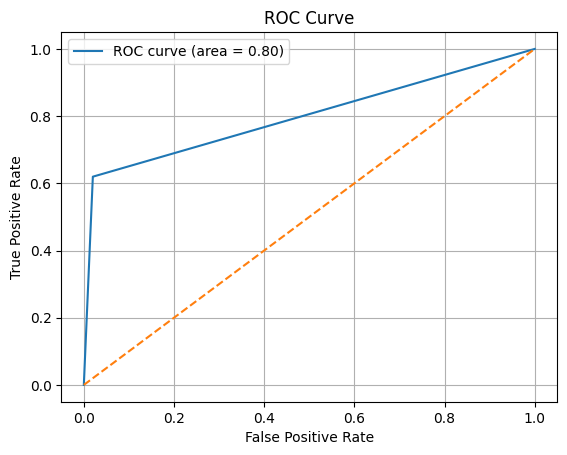

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Evaluation
print("✅ Evaluation Report")
print(classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


Chunk-Based Real-Time Simulation with Progress & Dashboard

In [ ]:
!pip install tqdm
from tqdm.notebook import tqdm


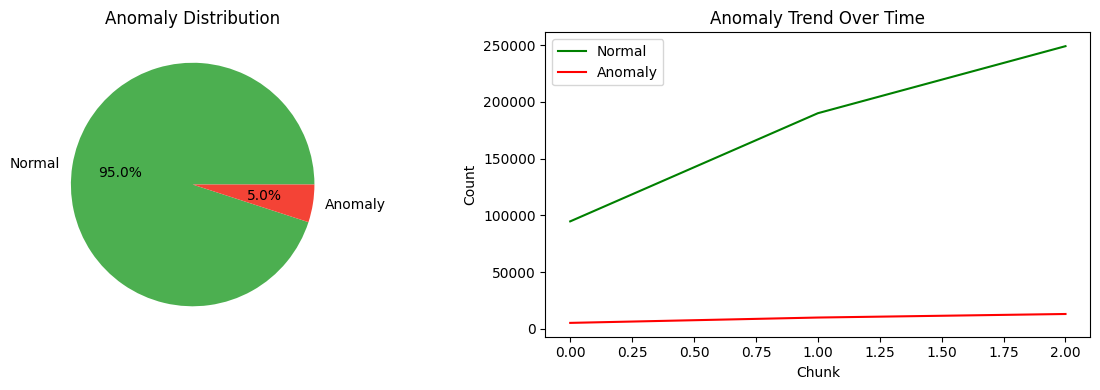

✅ Simulation complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm
from IPython.display import display, clear_output

# Simulated streaming in chunks
chunk_size = 100000
results = []

# For visualization
normal_counts = []
anomaly_counts = []
timestamps = []
time_index = 0

for i in tqdm(range(0, len(stream_data_scaled), chunk_size)):
    chunk = stream_data_scaled[i:i+chunk_size]
    preds = model.predict(chunk)
    chunk_results = [(i + j, 1 if pred == -1 else 0) for j, pred in enumerate(preds)]
    results.extend(chunk_results)

    # Update visual stats
    total_preds = pd.DataFrame(results, columns=["Index", "Prediction"])
    normal = total_preds['Prediction'].value_counts().get(0, 0)
    anomaly = total_preds['Prediction'].value_counts().get(1, 0)
    normal_counts.append(normal)
    anomaly_counts.append(anomaly)
    timestamps.append(time_index)
    time_index += 1

    # 🎯 Live Visualization
    clear_output(wait=True)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Pie chart: Normal vs Anomaly
    axs[0].pie([normal, anomaly], labels=["Normal", "Anomaly"], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
    axs[0].set_title("Anomaly Distribution")

    # Line plot over time
    axs[1].plot(timestamps, normal_counts, label='Normal', color='green')
    axs[1].plot(timestamps, anomaly_counts, label='Anomaly', color='red')
    axs[1].set_title("Anomaly Trend Over Time")
    axs[1].set_xlabel("Chunk")
    axs[1].set_ylabel("Count")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    time.sleep(0.01)  # Adjust for speed

print("✅ Simulation complete!")


export detected anomalies to csv

In [ ]:
import pandas as pd

# 🧠 Rebuild DataFrame with predictions
results_df = pd.DataFrame(results, columns=["Index", "Prediction"])
results_df["Prediction_Label"] = results_df["Prediction"].map({0: "Normal", 1: "Anomaly"})

# Optional: add back original case info if needed
# You must have `df` already loaded and aligned to results
if 'df' in globals():
    merged_df = df.reset_index(drop=True).copy()
    merged_df = merged_df.iloc[:len(results_df)]  # align if needed
    merged_df['Prediction'] = results_df['Prediction']
    merged_df['Prediction_Label'] = results_df['Prediction_Label']
else:
    merged_df = results_df  # fallback if df isn't available

# ✅ Save to CSV
merged_df.to_csv("anomaly_detection_results.csv", index=False)
print("📁 File 'anomaly_detection_results.csv' saved successfully!")


📁 File 'anomaly_detection_results.csv' saved successfully!


In [ ]:
from google.colab import files
files.download('anomaly_detection_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Final Report Summary

In [ ]:
# Final summary template
total = len(df)
anomalies = df['predicted_label'].sum()
normal = total - anomalies
accuracy = (df['predicted_label'] == df['true_label']).mean()

summary_text = f"""
🔍 Final Anomaly Detection Report
-------------------------------------
📄 Total Cases Analyzed: {total}
✅ Predicted Normal Cases: {normal}
⚠️ Predicted Anomalies: {anomalies}
🎯 Model Accuracy (vs. Manual Labels): {accuracy:.2%}
"""

print(summary_text)



🔍 Final Anomaly Detection Report
-------------------------------------
📄 Total Cases Analyzed: 262200
✅ Predicted Normal Cases: 249090
⚠️ Predicted Anomalies: 13110
🎯 Model Accuracy (vs. Manual Labels): 96.20%



alert simulation

In [ ]:
!pip install yagmail


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import yagmail
import re

# 1) Prepare your DataFrame
df_copy = df.copy()
df_copy['predicted_label'] = y_pred

activity_col = 'activity' if 'activity' in df_copy.columns else None
duration_col = 'duration' if 'duration' in df_copy.columns else None
anomalies = df_copy[df_copy['predicted_label'] == 1].copy()

# 2) Clean activity strings
if activity_col:
    anomalies[activity_col] = (
        anomalies[activity_col]
        .astype(str)
        .str.replace('\xa0', ' ', regex=False)
    )

# 3) Build the alert log
alert_log = []
for i, row in anomalies.iterrows():
    activity = row[activity_col] if activity_col else "N/A"
    duration = row[duration_col] if duration_col else "N/A"
    alert_message = f"⚠️ ALERT: Anomaly at trace #{i} — Activity: {activity}, Duration: {duration} sec"
    alert_log.append({
        'trace_id': i,
        'activity': activity,
        'duration': duration,
        'message': alert_message
    })

# 4) Email configuration
send_email_alerts = True
if send_email_alerts and alert_log:
    sender_email    = 'noornaderahmed255@gmail.com'
    sender_password = 'dfxc xoxe xmax zbdw'            # ← pasted string with NBSPs!
    receiver_email  = 'noornaderahmed255@gmail.com'

    # **Clean the password**: replace any NBSPs with normal spaces (or remove them)
    sender_password = sender_password.replace('\xa0', ' ').strip()

    # 5) Format email body
    email_lines = ["Summary:\n"]
    email_lines.append(f"- Total anomalies: {len(alert_log)}")
    email_lines.append(f"- Time: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
    email_lines.append(f"\n- Example anomalies:")

    # Show only the first 3 anomalies as examples
    for alert in alert_log[:5]:  # You can change the number here if you want more examples
        email_lines.append(f"    • Trace #{alert['trace_id']} — Activity: {alert['activity']}, Duration: {alert['duration']} sec")

    email_lines.append("\nFor full details, check the attached report ")

    email_body = "\n".join(email_lines)
    # Remove any remaining non-ASCII chars just in case
    email_body = re.sub(r'[^\x00-\x7F]+', '', email_body)

    # 6) Create and save the full report as a .txt file
    full_report = "Full Anomaly Report\n\n"
    for alert in alert_log:
        full_report += f"Trace #{alert['trace_id']} — Activity: {alert['activity']}, Duration: {alert['duration']} sec\n"

    file_name = "anomaly_report.txt"
    with open(file_name, 'w') as file:
        file.write(full_report)

    # 7) Send the email with the .txt file attachment
    try:
        yag = yagmail.SMTP(user=sender_email, password=sender_password, encoding='utf-8')
        yag.send(
            to=receiver_email,
            subject=f"⚠️ {len(alert_log)} Anomalies Detected in Business Process",
            contents=email_body,
            attachments=file_name
        )
        print("📧 Summary email alert sent successfully.")
    except Exception as e:
        print("❌ Failed to send summary email:", e)

print("✅ Anomaly detection and alerting complete.")


📧 Summary email alert sent successfully.
✅ Anomaly detection and alerting complete.
